# Color Discretization

### ColorDiscretizer demo

In [1]:
from utils.color_discretizer import ColorDiscretizer
from utils.color_utils import YUV_to_RGB, RGB_to_YUV
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd = ColorDiscretizer()
imdir = "../data/iccv09Data/images/"
cd.train(imdir, 30)

/Users/marc/Documents/Dropbox/Stanford/Class/3rdQuarter/CS231N/project/all-colors-matter/utils/color_discretizer.py:59: RuntimeWarning: divide by zero encountered in log10
  logheatmap = np.log10(self.heatmap)


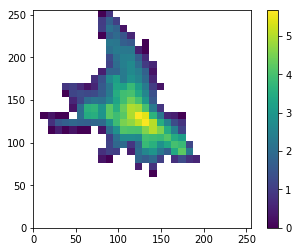

In [3]:
cd.plot_heatmap()

In [4]:
from scipy.ndimage import imread
from utils.color_utils import RGB_to_YUV

image = imread("../data/iccv09Data/images/0002136.jpg").astype(np.dtype("float32"))
YUVimage = RGB_to_YUV(image)
UVimage = YUVimage[:, :, 1:]
UVpixels = np.reshape(UVimage, newshape=[-1, 2])

/Users/marc/.miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


In [5]:
cd.categorize(UVpixels)

[138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 148,
 148,
 148,
 148,
 148,
 148,
 148,
 148,
 148,
 148,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 137,
 137,
 137,
 148,
 137,
 148,
 148,
 148,
 148,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 149,
 149,
 149,
 149,
 149,
 149,
 149,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 149,
 149,
 149,
 149,
 138,
 138,
 138,
 148,
 148,
 148,
 148,
 148,
 148,
 148,
 148,
 137,
 137,
 138,
 138,
 138,
 109,
 109,
 109,
 109,
 92,
 92,
 92,
 92,
 92,
 92,
 109,
 109,
 109,
 109,
 109,
 109,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 138,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110

In [6]:
unique, counts = np.unique(cd.categorize(UVpixels), return_counts=True)

In [7]:
unique

array([  0,  30,  31,  42,  43,  44,  45,  46,  47,  48,  50,  51,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 160, 163])

In [8]:
counts

array([  131,     1,     3,     1,     4,    37,    63,    42,    33,
           2,     3,     1,     3,    54,   106,   121,   128,    60,
          45,    35,     4,     1,    19,     1,    17,    61,   101,
         128,   152,   176,   123,   188,    69,     4,     1,   126,
          66,    76,   153,   146,   144,   203,   296,   206,   162,
         193,    35,     2,    21,   342,  2090,  1218,   718,   528,
         375,   301,   229,   198,   162,    79,     3,  1822,  8257,
       10063,  1554,   846,   393,   246,   174,   147,    49,    46,
           3,   243, 10594, 12673,  1543,   304,   170,    91,    34,
          17,     1,    26,  3000, 11566,  2114,    89,    59,    33,
           2,   315,   297,     6,    27,     1,     1,     4])

In [9]:
categories_distributions = np.abs(np.random.rand(10, cd.n_categories))
cd.UVpixels_from_distribution(categories_distributions)


array([[111.30791574, 146.61396442],
       [112.79434032, 143.85787551],
       [111.53255965, 142.09171489],
       [110.79076001, 144.54051149],
       [111.5322128 , 144.63660105],
       [111.8569373 , 142.9519114 ],
       [113.21154796, 141.95074436],
       [110.07957701, 142.67856659],
       [112.60374005, 140.85680193],
       [109.27626723, 147.52480616]])

### L2 cost of categorizing

In [10]:
image = imread("../data/iccv09Data/images/0002136.jpg").astype(np.dtype("float32"))
YUVimage = RGB_to_YUV(image)
UVimage = YUVimage[:, :, 1:]
Yimage = YUVimage[:, :, :1]
UVpixels = np.reshape(UVimage, newshape=[-1, 2])

/Users/marc/.miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if __name__ == '__main__':


In [11]:
pixels_categories = cd.categorize(UVpixels)

pixel_categories_onehot = np.zeros([len(pixels_categories), cd.n_categories])
pixel_categories_onehot[range(len(pixels_categories)), pixels_categories] = 1

reconstructed_UVpixels = cd.UVpixels_from_distribution(pixel_categories_onehot)
reconstructed_UVimage = np.reshape(reconstructed_UVpixels, newshape=UVimage.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


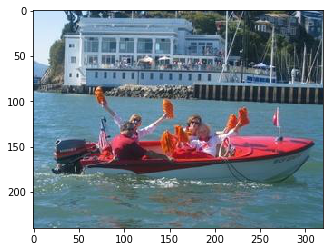

In [12]:
plt.imshow(YUV_to_RGB(np.concatenate([Yimage, UVimage], axis=2)) / 255)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


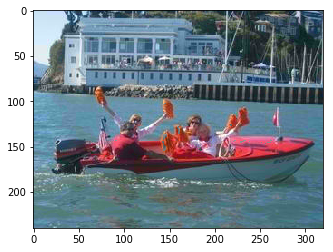

In [15]:
plt.imshow(YUV_to_RGB(np.concatenate([Yimage, reconstructed_UVimage], axis=2)) / 255)
plt.show()

In [17]:
np.linalg.norm(reconstructed_UVpixels - UVpixels, axis = 0) / len(UVpixels) / np.std(UVpixels, axis = 0)

array([0.00103728, 0.00067316])

Note that sometimes, the return to RGB space goes over 255 or below 0. 

In [22]:
print(np.max(YUV_to_RGB(np.concatenate([Yimage, UVimage], axis=2))))
print(np.min(YUV_to_RGB(np.concatenate([Yimage, UVimage], axis=2))))

255.000001162996
-2.3071272039487667e-06


In [21]:
print(np.max(YUV_to_RGB(np.concatenate([Yimage, reconstructed_UVimage], axis=2))))
print(np.min(YUV_to_RGB(np.concatenate([Yimage, reconstructed_UVimage], axis=2))))

262.475958305796
-6.780124214119951


### Thresholding out rare pixels

/Users/marc/Documents/Dropbox/Stanford/Class/3rdQuarter/CS231N/project/all-colors-matter/utils/color_discretizer.py:61: RuntimeWarning: divide by zero encountered in log10
  logheatmap = np.log10(hm)


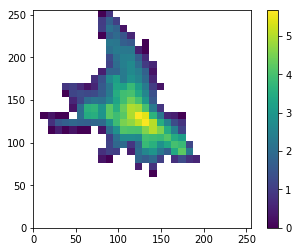

Remaining color: 211


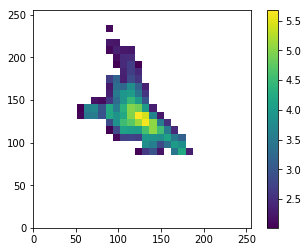

Remaining color: 107


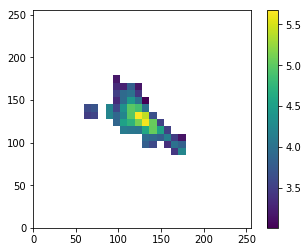

Remaining color: 58


In [6]:
for threshold in [0, 100, 1000]:
    cd = ColorDiscretizer(threshold=threshold)
    imdir = "../data/iccv09Data/images/"
    cd.train(imdir, 30)
    cd.plot_heatmap()
    print("Remaining colors: {}".format(np.sum(cd.heatmap > cd.threshold)))